In [2]:
##Libraies

In [3]:
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Exploratory Data Analyis

In [4]:
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [5]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.tail(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [8]:
data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [9]:
data['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [10]:
data['parking'].value_counts()

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

In [11]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
data.shape

(545, 13)

In [13]:
data.size

7085

In [14]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [15]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [17]:
#data["mainroad"]=data["mainroad"].map({'yes':1,"no":0})

In [18]:
#data.head(2)

In [19]:
data["mainroad"]=data["mainroad"].map({'yes':1,"no":0})
data["guestroom"]=data["guestroom"].map({'yes':1,"no":0})
data["basement"]=data["basement"].map({'yes':1,'no':0})
data["hotwaterheating"]=data["hotwaterheating"].map({'yes':1,'no':0})
data["airconditioning"]=data["airconditioning"].map({'yes':1,'no':0})
data["prefarea"]=data["prefarea"].map({'yes':1,'no':0})
#data["furnishingstatus"]=data["furnishingstatus"].map({'furnished':1,'unfurnished':0})

#hot coding
data=pd.get_dummies(data,columns=['furnishingstatus'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [20]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [21]:
# data["prefarea"]=data["prefarea"].map({'yes':1,'no':0})
# #data["furnishingstatus"]=data["furnishingstatus"].map({'furnished':1,'unfurnished':0})
# data=pd.get_dummies(data,columns=['furnishingstatus'])
# data

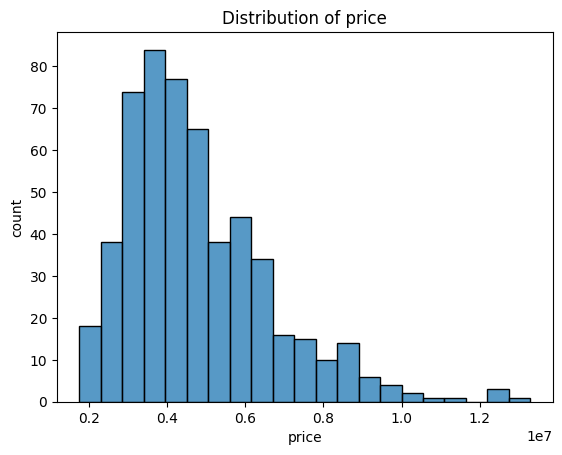

In [22]:
#plt.hist(data["price"])
snm.histplot(data['price'])
plt.title("Distribution of price")#draw the data into graph
plt.xlabel("price")
plt.ylabel("count")
plt.show()

In [23]:
#insights:-price is more inclined towards 0.4

In [24]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


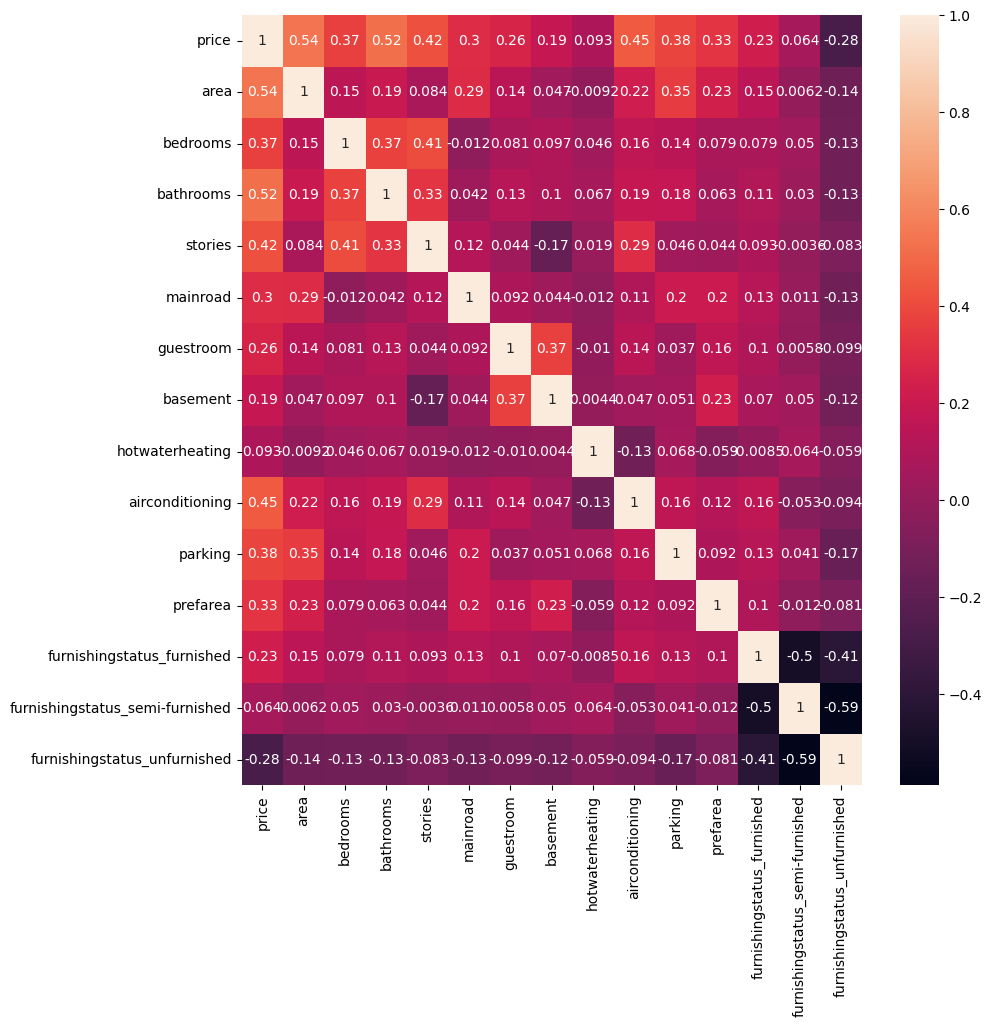

In [25]:
corr_mat=data.corr()
plt.figure(figsize=(10,10))
snm.heatmap(corr_mat,annot=True)
plt.title=("correction error")
plt.show()

<Axes: xlabel='bedrooms', ylabel='price'>

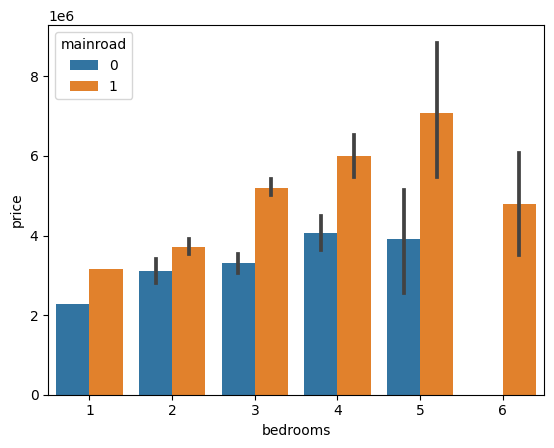

In [26]:
snm.barplot(data=data,x="bedrooms",y="price",hue="mainroad")

<Axes: xlabel='basement', ylabel='area'>

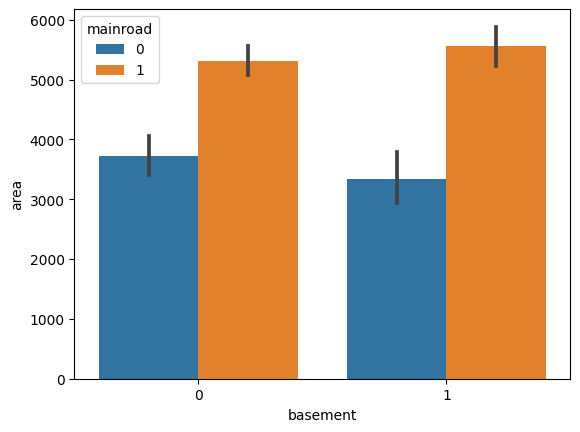

In [27]:
snm.barplot(data=data,x="basement",y="area",hue="mainroad")

<Axes: xlabel='guestroom', ylabel='price'>

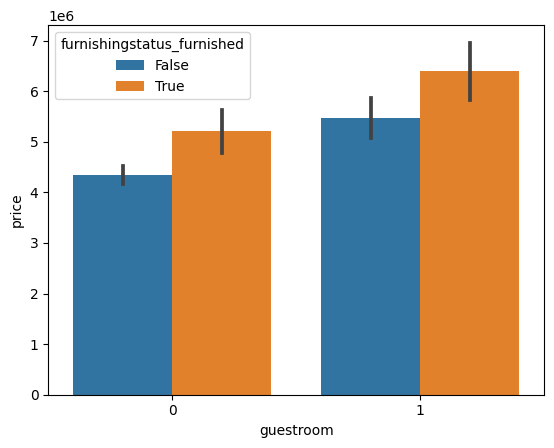

In [28]:
snm.barplot(data=data,x="guestroom",hue="furnishingstatus_furnished",y="price")

<Axes: xlabel='bedrooms', ylabel='price'>

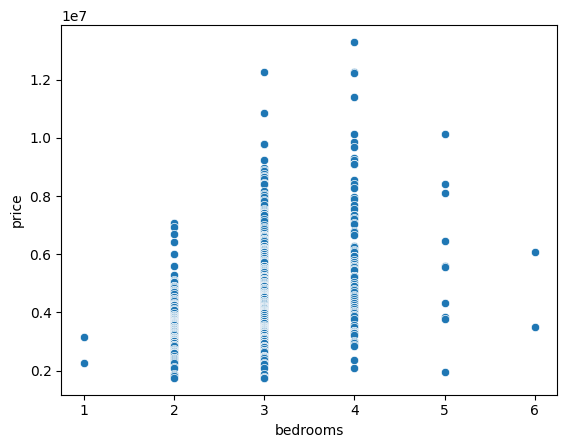

In [29]:
snm.scatterplot(data=data,x="bedrooms",y="price")

<Axes: xlabel='basement', ylabel='stories'>

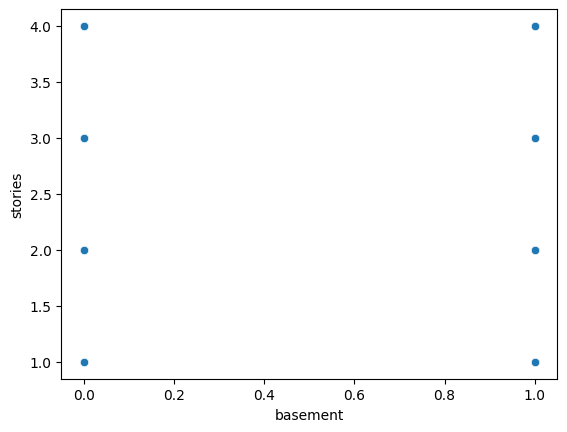

In [30]:
snm.scatterplot(data=data,x="basement",y="stories")

In [3]:
snm.scatterplot(data=data,x="basement",y="stories")

NameError: name 'snm' is not defined

In [32]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [33]:
for i in range():

SyntaxError: expected ':' (1816844243.py, line 1)

In [2]:
snm.pairplot(data)

NameError: name 'snm' is not defined

In [1]:
selected_col=[ 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking','furnishingstatus_semi-furnished']
for col in selected_col:
    snm.barplot(data=data,x=col,y="price")
    plt.show()

NameError: name 'snm' is not defined

In [38]:
data.shape

(545, 15)

traing and testing the data


In [41]:
X=data.drop("price",axis=1)#remove data (drop)and find the data when input is given
Y=data["price"]  #spliting is done

In [42]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [51]:
d=train_test_split(X,Y,test_size=0.25,random_state=50)
d

[     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement   
 378  2275         3          1        3         1          0         0  \
 505  4000         3          1        2         1          0         0   
 304  8250         3          1        1         1          0         1   
 238  4510         4          2        2         1          0         1   
 328  4500         3          2        2         0          0         1   
 ..    ...       ...        ...      ...       ...        ...       ...   
 70   4000         3          2        2         1          0         1   
 132  5200         3          1        3         1          0         0   
 289  5850         2          1        1         1          1         1   
 109  6615         4          2        2         1          1         0   
 480  3480         3          1        2         0          0         0   
 
      hotwaterheating  airconditioning  parking  prefarea   
 378                1                

In [44]:
type(train_test_split(X,Y,test_size=0.25,random_state=50))

list

In [46]:
d[0]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
378,2275,3,1,3,1,0,0,1,1,0,1,False,True,False
505,4000,3,1,2,1,0,0,0,1,0,0,False,False,True
304,8250,3,1,1,1,0,1,0,0,3,0,False,True,False
238,4510,4,2,2,1,0,1,0,0,0,0,False,True,False
328,4500,3,2,2,0,0,1,0,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,4000,3,2,2,1,0,1,0,1,0,1,False,True,False
132,5200,3,1,3,1,0,0,0,1,0,0,False,True,False
289,5850,2,1,1,1,1,1,0,0,2,0,False,True,False
109,6615,4,2,2,1,1,0,1,0,1,0,False,True,False


In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=50)

In [65]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
378,2275,3,1,3,1,0,0,1,1,0,1,False,True,False
505,4000,3,1,2,1,0,0,0,1,0,0,False,False,True
304,8250,3,1,1,1,0,1,0,0,3,0,False,True,False
238,4510,4,2,2,1,0,1,0,0,0,0,False,True,False
328,4500,3,2,2,0,0,1,0,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,4000,3,2,2,1,0,1,0,1,0,1,False,True,False
132,5200,3,1,3,1,0,0,0,1,0,0,False,True,False
289,5850,2,1,1,1,1,1,0,0,2,0,False,True,False
109,6615,4,2,2,1,1,0,1,0,1,0,False,True,False


In [66]:
len(X_train)

408

In [67]:
len(Y_train)

408

In [68]:
Y_train

378    3640000
505    2653000
304    4193000
238    4613000
328    3990000
        ...   
70     6790000
132    5810000
289    4200000
109    6090000
480    2940000
Name: price, Length: 408, dtype: int64

In [69]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
333,3000,3,1,2,1,0,0,0,0,0,0,False,True,False
37,9000,4,2,4,1,0,0,0,1,2,0,True,False,False
396,3640,2,1,1,1,0,0,0,0,1,0,False,True,False
494,6800,2,1,1,1,0,0,0,0,0,0,False,False,True
536,3420,5,1,2,0,0,0,0,0,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,5800,2,1,1,1,1,1,0,1,0,0,False,True,False
148,6360,3,1,3,1,0,0,0,0,0,1,False,True,False
76,6420,3,2,3,1,0,0,0,1,0,1,True,False,False
100,6600,3,2,1,1,0,1,0,1,0,1,False,False,True


In [70]:
Y_test

333    3920000
37     7980000
396    3500000
494    2730000
536    1960000
        ...   
206    4900000
148    5600000
76     6650000
100    6230000
87     6475000
Name: price, Length: 137, dtype: int64

In [71]:
#X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.5,random_state=25)

In [72]:
#Y_train

# Model Traing

In [74]:
LR_model=LinearRegression()

In [75]:
LR_model.fit(X_train,Y_train)

LinearRegression()

In [76]:
LR_model.fit(X_test,Y_test)

LinearRegression()

In [78]:
# Y_pred is the model predict from X_test data
Y_pred=LR_model.predict(X_test)

In [79]:
Y_pred

array([ 3052135.94468709,  8276936.05510601,  2945023.58410038,
        3278285.91642273,  3093193.16882496,  7601386.2708859 ,
        6542624.62209685,  4798922.74688358,  4178236.20773088,
        4017457.20394708,  2656783.0459529 ,  3683004.63958236,
        3602147.52224636,  4937649.54840872,  4349319.23309887,
        3724320.17676574,  5172572.43975492,  3676310.12580894,
        6106056.15286906,  6959169.60484592,  5314618.90942422,
        5710066.77594407,  4538963.38855386,  3557014.99969663,
        5365776.81884686,  2454381.99120743,  4254285.33893773,
        2844195.86716603,  5663173.61184033,  2656471.63324137,
        4296753.03778436,  5051234.09044187,  3952120.01111846,
        5182102.7687588 ,  6368158.54259546,  2455460.33354811,
        3065919.26849085,  6482060.37553857,  4441551.25712467,
        5190394.23796062,  3716718.63030046,  2529944.61634875,
        3343905.58502204,  7141060.3592085 ,  3856555.96033723,
        5929204.70714912,  3370115.03383

In [90]:
Y_test[333]-Y_pred[0]

867864.0553129148

In [85]:
Y_pred[0]

3052135.944687085

(array([32., 28., 20., 21., 18., 12.,  4.,  1.,  0.,  1.]),
 array([ 2362146.20586886,  3235729.10721482,  4109312.00856077,
         4982894.90990672,  5856477.81125268,  6730060.71259863,
         7603643.61394458,  8477226.51529054,  9350809.41663649,
        10224392.31798244, 11097975.2193284 ]),
 <BarContainer object of 10 artists>)

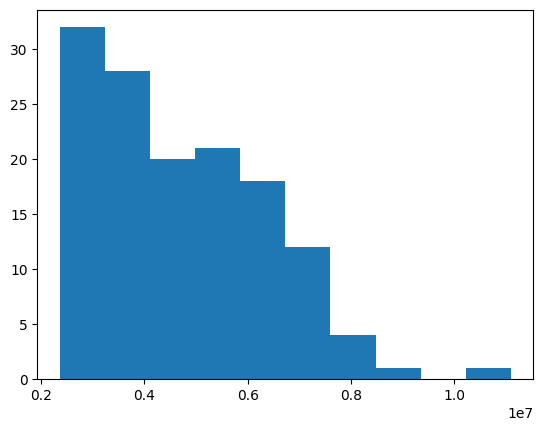

In [83]:
plt.hist(Y_pred)

(array([15., 40., 24., 26., 19.,  4.,  5.,  3.,  0.,  1.]),
 array([ 1750000.,  2800000.,  3850000.,  4900000.,  5950000.,  7000000.,
         8050000.,  9100000., 10150000., 11200000., 12250000.]),
 <BarContainer object of 10 artists>)

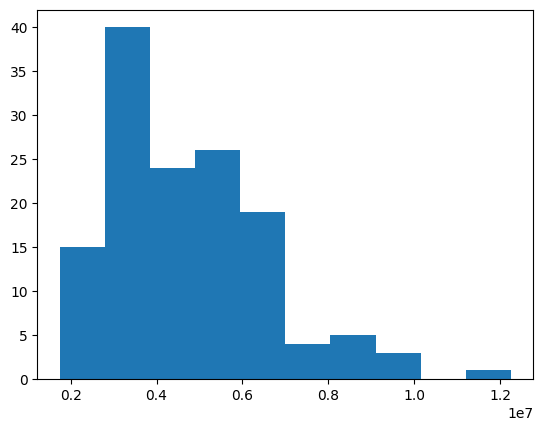

In [81]:
#plt.plot(Y_test)
plt.hist(Y_test)

In [1]:
plt.scatter(x=Y_test[333]-Y_pred[0])

NameError: name 'plt' is not defined